# Network classifier notebook
For implementing new ideas!

In [1]:
import numpy as np

# Basic script to run network state classfication

from loadSeizureData  import LoadSeizureData
from classifierTester import ClassifierTester
from basicFeatures    import BasicFeatures
from randomForestClassifier import RandomForest
from freqfeatures     import FreqFeatures

dirpath = '/Users/Jonathan/Documents/PhD /Seizure_related/Network_states/VMData/Classified'


dataobj = LoadSeizureData(dirpath)
dataobj.load_data()

basicStatsExtractor = BasicFeatures()
#freqextractor = FreqFeatures()
dataobj.extract_feature_array([basicStatsExtractor])
#dataobj.extract_feature_array([freqextractor])

rf = RandomForest(no_trees = 100)
results = []
runs = 10
for i in range(runs):
    classtester = ClassifierTester(dataobj.features,np.ravel(dataobj.label_colarray), training_test_split = 80)
    (score, predictedlabelsprobs, reallabels) = classtester.test_classifier(rf)
    results.append(score)

print 'training a random forest classifier!'
print results
print np.mean(results), ' mean score'


here2
training a random forest classifier!
[78.688524590163937, 75.409836065573771, 78.688524590163937, 80.327868852459019, 83.606557377049185, 83.606557377049185, 85.245901639344254, 80.327868852459019, 81.967213114754102, 70.491803278688522]
79.8360655738  mean score


## Understanding the feature dataset
1. scatter plot matrix
2. pca projection
3. Correct labels!

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
from pandas.tools.plotting import radviz
from pandas.tools.plotting import scatter_matrix
import pandas as pd
print dataobj.features.shape
#df = pd.DataFrame(dataobj.features, columns = ['kurtosis','skew','coastline'])
#df = pd.DataFrame(dataobj.features, columns = ['kurtosis','skew','variation','coastline'])
df = pd.DataFrame(dataobj.features)

(301, 4)


In [3]:
df.head()

,0,1,2,3
0,-1.360389,1.455803,0.025240,0.166522
1,0.793689,-1.815485,0.031096,-0.661072
2,-0.840246,0.709462,0.005613,0.517446
3,-0.043495,-0.129536,0.015380,-0.293529
4,-0.150470,-0.161241,0.056715,2.175661


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10ae7ca50>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10b997550>]], dtype=object)

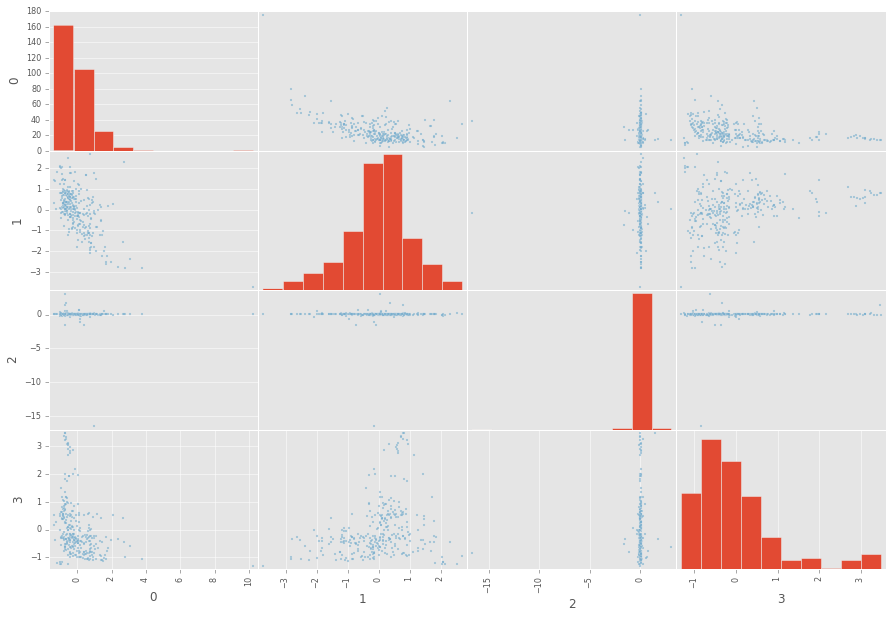

In [4]:
scatter_matrix(df,figsize = (15,10));
#plt.savefig('scattermatrixnonorm.png')

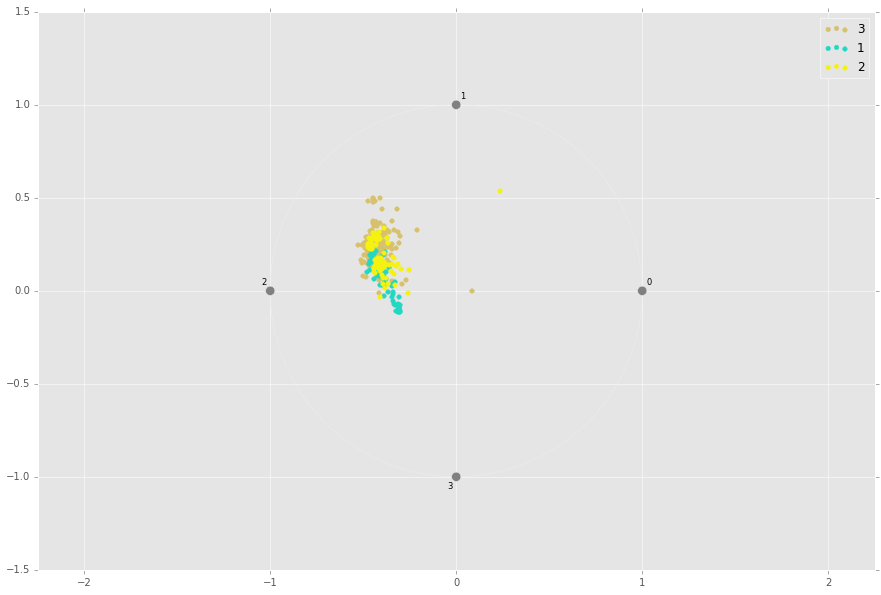

In [5]:
plt.figure(figsize = (15,10))
df['labels'] = dataobj.label_colarray
radviz(df,'labels')

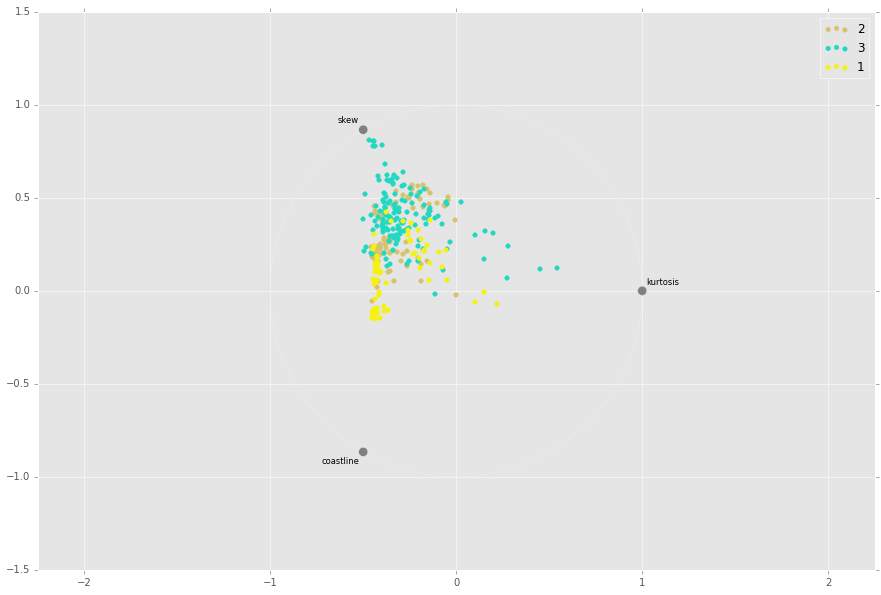

In [9]:
plt.figure(figsize = (15,10))
df['labels'] = dataobj.label_colarray
radviz(df,'labels')
#plt.savefig('radviz.png')

In [ ]:
np.fft.fft()